In [1]:
# This experiments are not included in the paper. They show how to compute the optimal decisions
# for the cost function described in Section 2.2.

import numpy as np
import matplotlib.pyplot as plt


[[ 0.    0.45  0.5 ]
 [ 0.   -0.24 -0.4 ]]
[[0.5  0.05 0.  ]
 [0.   0.24 0.4 ]]


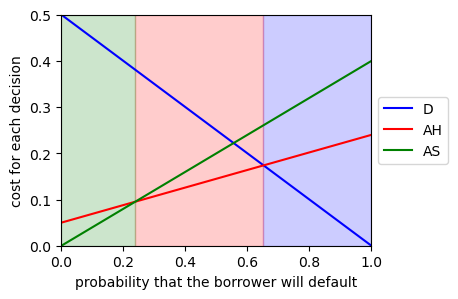

In [2]:
# Fraction of people among those that would pay off their loans that accept the higher interest rate loan
beta = 0.5

# Fraction of the principal loan corresponding to the total interest paid by the borrower for the
# two different interest rates. 
# Note that alpha is not the annual interest rate itself but, rather, total_interest_paid / principal
alphaS = 0.5
alphaH = 0.9

# Fraction of the total amount to be paid that is actually paid by a defaulting borrower
gamma = 0.4

# Utility matrix
U = np.array([[0, beta*alphaH,        alphaS], 
              [0, gamma*(1+alphaH)-1, gamma*(1+alphaS)-1]])

# Cost matrix
C = -U 
C = C - np.min(C, axis=1, keepdims=True)

print(U)
print(C)


x = np.arange(0,1.0,0.001)

# Compute the cost function for each x given these costs
cost_for_dec0 = C[0,0] * (1-x) + C[1,0] * x
cost_for_dec1 = C[0,1] * (1-x) + C[1,1] * x
cost_for_dec2 = C[0,2] * (1-x) + C[1,2] * x

plt.figure(figsize=(4,3))
plt.plot(x,cost_for_dec0, 'blue',  label="D")
plt.plot(x,cost_for_dec1, 'red',   label="AH")
plt.plot(x,cost_for_dec2, 'green', label="AS")
plt.xlabel('probability that the borrower will default')
plt.ylabel('cost for each decision')

crossing01 = np.argmin(np.abs(cost_for_dec0-cost_for_dec1))
crossing12 = np.argmin(np.abs(cost_for_dec1-cost_for_dec2))

m = 0.5
# Add shading to the area to the right of the crossing point
plt.fill_between(x[crossing01-1:], 0, m, color='blue', alpha=0.2)
plt.fill_between(x[crossing12-1:crossing01], 0, m, color='red', alpha=0.2)
plt.fill_between(x[0:crossing12], 0, m, color='green', alpha=0.2)
plt.xlim(0,1)
plt.ylim(0,m)


# Print legend outside the plot, on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig("outputs/cost_curves_for_loan_example.pdf")
